In [90]:
%matplotlib inline

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [94]:
df = pd.read_csv('/Users/stuber/Desktop/UA/Lab 05/summer-travel-gps-full.csv')
df.head()

,lat,lon,date,city,country
0,51.481292,-0.451011,05/14/2014 09:07,West Drayton,United Kingdom
1,51.474005,-0.450999,05/14/2014 09:22,Hounslow,United Kingdom
2,51.478199,-0.446081,05/14/2014 10:51,Hounslow,United Kingdom
3,51.478199,-0.446081,05/14/2014 11:24,Hounslow,United Kingdom
4,51.474146,-0.451562,05/14/2014 11:38,Hounslow,United Kingdom


In [96]:
df[['city', 'country']]

,city,country
0,West Drayton,United Kingdom
1,Hounslow,United Kingdom
2,Hounslow,United Kingdom
3,Hounslow,United Kingdom
4,Hounslow,United Kingdom
...,...,...
1754,Munich,Germany
1755,Munich,Germany
1756,Munich,Germany
1757,Munich,Germany


In [98]:
df['city'].head(5)

0    West Drayton
1        Hounslow
2        Hounslow
3        Hounslow
4        Hounslow
Name: city, dtype: object

In [100]:
df.loc[2]

lat               51.478199
lon               -0.446081
date       05/14/2014 10:51
city               Hounslow
country      United Kingdom
Name: 2, dtype: object

In [102]:
df.loc[0, 'country']

'United Kingdom'

In [104]:
df.loc[:3, ['city', 'date']]

,city,date
0,West Drayton,05/14/2014 09:07
1,Hounslow,05/14/2014 09:22
2,Hounslow,05/14/2014 10:51
3,Hounslow,05/14/2014 11:24


In [106]:
df.iloc[2, 1]

-0.446081

In [108]:
df.iloc[::300]

,lat,lon,date,city,country
0,51.481292,-0.451011,05/14/2014 09:07,West Drayton,United Kingdom
300,41.377091,2.151175,05/20/2014 03:18,Barcelona,Spain
600,50.052338,19.946220,05/31/2014 21:10,Krakow,Poland
900,48.561181,9.059672,06/09/2014 15:12,Tübingen,Germany
1200,41.378301,2.187443,06/17/2014 16:37,Barcelona,Spain
1500,42.208201,20.735993,06/30/2014 08:27,Prizren,Kosovo


In [110]:
df = pd.read_csv('/Users/stuber/Desktop/UA/Lab 05/summer-travel-gps-simplified.csv')
df.tail()

,lat,lon,date,city,country
173,41.044556,28.983285,07/08/2014 16:44,Istanbul,Turkey
174,41.008992,28.968268,07/08/2014 20:03,Istanbul,Turkey
175,41.043487,28.985488,07/08/2014 22:18,Istanbul,Turkey
176,40.977637,28.823879,07/09/2014 09:03,Istanbul,Turkey
177,48.357110,11.791346,07/09/2014 13:20,Munich,Germany


In [112]:
df['city'] == 'Munich'

0      False
1      False
2      False
3      False
4      False
       ...  
173    False
174    False
175    False
176    False
177     True
Name: city, Length: 178, dtype: bool

In [114]:
df_spain = df[(df['country'] == 'Spain') & (df['city'] != 'Barcelona')]

In [116]:
df[(df['city'] == 'Munich') | (df['country'] == 'Serbia')]

,lat,lon,date,city,country
139,44.821164,20.289821,06/21/2014 01:59,Belgrade,Serbia
140,44.820414,20.463465,06/21/2014 18:44,Belgrade,Serbia
141,44.761583,19.577904,06/22/2014 07:58,Slepčević,Serbia
177,48.357110,11.791346,07/09/2014 13:20,Munich,Germany


In [118]:
df[df['lon'] < 0].shape[0]

24

In [120]:
df[df['city'].str.startswith('G')]

,lat,lon,date,city,country
62,50.273632,18.729429,06/02/2014 06:39,Gliwice,Poland
114,48.282940,8.199630,06/10/2014 13:33,Gutach,Germany
115,48.389029,8.021342,06/10/2014 13:48,Gengenbach,Germany
152,40.187825,20.079303,07/04/2014 17:42,Gjirokastër,Albania


In [122]:
num_unique_cities = df['city'].nunique()
num_unique_countries = df['country'].nunique()
print(f"Unique cities: {num_unique_cities}, Unique countries: {num_unique_countries}")

Unique cities: 91, Unique countries: 15


In [124]:
df.groupby('country')['city'].unique()

country
Albania                                                [Berat, Gjirokastër]
Bosnia and Herzegovina                                   [Sarajevo, Mostar]
Croatia                                           [Ploče, Split, Dubrovnik]
Czech Republic            [Novy Bohumin, Hranice, Prerov, Ústí nad Orlic...
Germany                   [Kümmersbruck, Winkelhaid, Kammerstein, Ellhof...
Greece                    [Kakavia, Dytiki Ellada, Peloponnese, Athens, ...
Kosovo                                                            [Prizren]
Macedonia (FYROM)                                                   [Ohrid]
Montenegro                                                          [Kotor]
Poland                    [Zendek, Silesian Voivodeship, Dabrowa Gornicz...
Portugal                  [Lisbon, Algueirão-Mem Martins, Sintra, Azambu...
Serbia                                                [Belgrade, Slepčević]
Spain                     [El Prat de Llobregat, Viladecans, Barcelona, ...
Turk

In [126]:
dt = pd.read_csv('/Users/stuber/Desktop/UA/Lab 05/summer-travel-gps-full.csv', index_col='date', parse_dates=True)
dt.head()

,lat,lon,city,country
date,,,,
2014-05-14 09:07:00,51.481292,-0.451011,West Drayton,United Kingdom
2014-05-14 09:22:00,51.474005,-0.450999,Hounslow,United Kingdom
2014-05-14 10:51:00,51.478199,-0.446081,Hounslow,United Kingdom
2014-05-14 11:24:00,51.478199,-0.446081,Hounslow,United Kingdom
2014-05-14 11:38:00,51.474146,-0.451562,Hounslow,United Kingdom


In [128]:
dt.index.is_unique

False

In [130]:
dt = dt[~dt.index.duplicated()]

In [132]:
weekday_df = dt[dt.index.weekday < 5]
weekend_df = dt[dt.index.weekday >= 5]

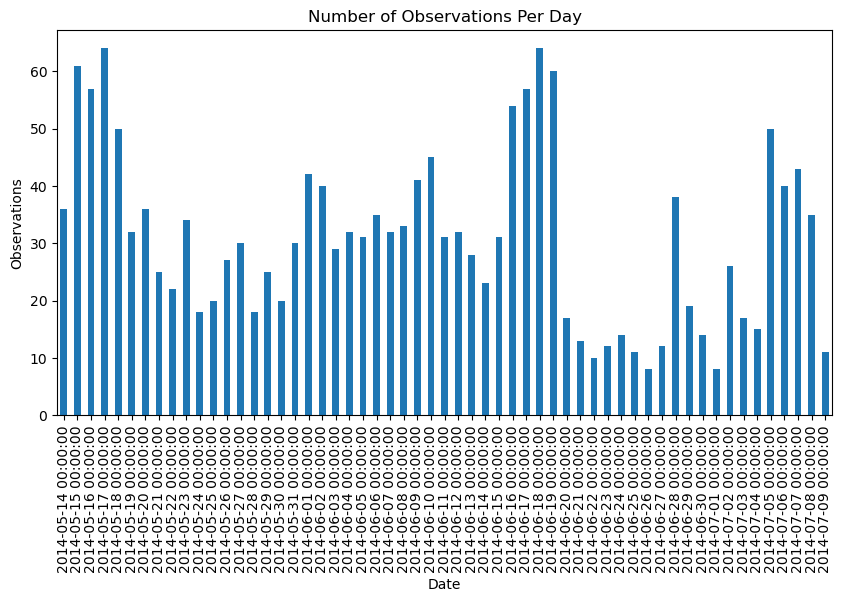

In [134]:
dt.resample('D').size().plot(kind='bar', figsize=(10,5))
plt.xlabel('Date')
plt.ylabel('Observations')
plt.title('Number of Observations Per Day')
plt.show()